# Weather Analysis

In [13]:
import requests
import json
from datetime import datetime

# URL to fetch the weather data
url = "https://samples.openweathermap.org/data/2.5/forecast?q=M%C3%BCnchen,DE&appid=b1b15e88fa797225412429c1c50c122a1"

try:
    # Fetching the data from the API
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
    weather_data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred while fetching the data: {e}")
    weather_data = {}

# Function to format and display weather forecast
def display_weather_forecast(data):
    forecast_list = data.get("list", [])
    if not forecast_list:
        print("No weather data available.")
        return

    for forecast in forecast_list:
        dt = datetime.utcfromtimestamp(forecast["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        temp = forecast["main"]["temp"] - 273.15  # Convert temperature from Kelvin to Celsius
        description = forecast["weather"][0]["description"]
        wind_speed = forecast["wind"]["speed"]
        humidity = forecast["main"]["humidity"]

        print(f"Date and Time: {dt}")
        print(f"Temperature: {temp}°C")
        print(f"Weather: {description}")
        print(f"Wind Speed: {wind_speed} m/s")
        print(f"Humidity: {humidity}%")
        print("-" * 40)

# Display the weather forecast
display_weather_forecast(weather_data)

Date and Time: 2017-02-16 12:00:00
Temperature: 13.520000000000039°C
Weather: clear sky
Wind Speed: 1.81 m/s
Humidity: 75%
----------------------------------------
Date and Time: 2017-02-16 15:00:00
Temperature: 12.510000000000048°C
Weather: clear sky
Wind Speed: 1.59 m/s
Humidity: 70%
----------------------------------------
Date and Time: 2017-02-16 18:00:00
Temperature: 3.900000000000034°C
Weather: clear sky
Wind Speed: 1.41 m/s
Humidity: 90%
----------------------------------------
Date and Time: 2017-02-16 21:00:00
Temperature: -0.37000000000000455°C
Weather: clear sky
Wind Speed: 2.24 m/s
Humidity: 80%
----------------------------------------
Date and Time: 2017-02-17 00:00:00
Temperature: 0.19100000000003092°C
Weather: broken clouds
Wind Speed: 3.59 m/s
Humidity: 85%
----------------------------------------
Date and Time: 2017-02-17 03:00:00
Temperature: 2.4180000000000064°C
Weather: light rain
Wind Speed: 3.77 m/s
Humidity: 89%
----------------------------------------
Date and 

In [14]:
import pandas as pd

# Function to format and display weather forecast using pandas
def display_weather_forecast_pandas(data):
    forecast_list = data.get("list", [])
    if not forecast_list:
        print("No weather data available.")
        return

    forecast_data = []
    for forecast in forecast_list:
        dt = datetime.utcfromtimestamp(forecast["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        temp = forecast["main"]["temp"] - 273.15  # Convert temperature from Kelvin to Celsius
        description = forecast["weather"][0]["description"]
        wind_speed = forecast["wind"]["speed"]
        humidity = forecast["main"]["humidity"]

        forecast_data.append([dt, temp, description, wind_speed, humidity])

    df = pd.DataFrame(forecast_data, columns=["Date and Time", "Temperature (°C)", "Weather", "Wind Speed (m/s)", "Humidity (%)"])
    return df
display_weather_forecast_pandas(weather_data)

,Date and Time,Temperature (°C),Weather,Wind Speed (m/s),Humidity (%)
0,2017-02-16 12:00:00,13.520,clear sky,1.81,75
1,2017-02-16 15:00:00,12.510,clear sky,1.59,70
2,2017-02-16 18:00:00,3.900,clear sky,1.41,90
3,2017-02-16 21:00:00,-0.370,clear sky,2.24,80
4,2017-02-17 00:00:00,0.191,broken clouds,3.59,85
5,2017-02-17 03:00:00,2.418,light rain,3.77,89
6,2017-02-17 06:00:00,3.328,moderate rain,3.81,97
7,2017-02-17 09:00:00,3.520,light rain,2.60,100
8,2017-02-17 12:00:00,5.103,light rain,3.17,95
9,2017-02-17 15:00:00,3.305,light rain,3.21,99


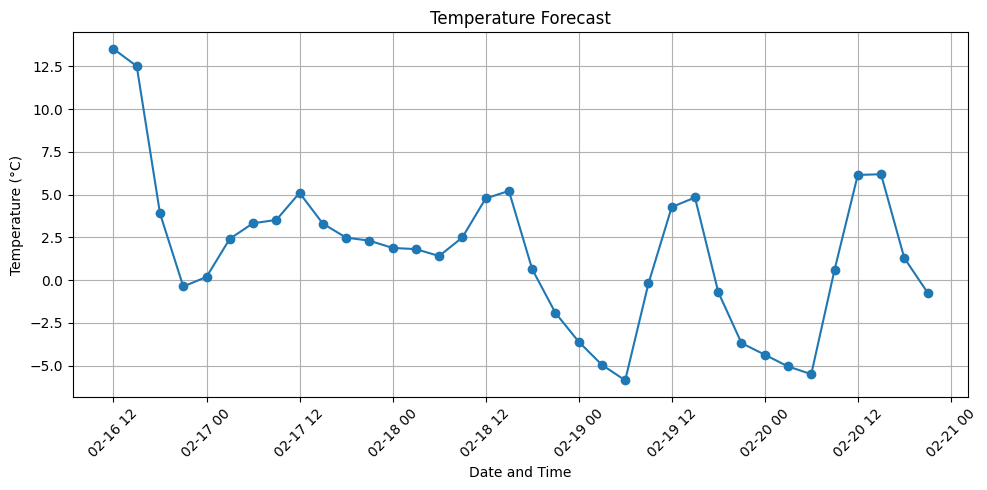

In [15]:
import matplotlib.pyplot as plt

# Extracting data for plotting
dates = [datetime.utcfromtimestamp(forecast["dt"]) for forecast in weather_data.get("list", [])]
temperatures = [forecast["main"]["temp"] - 273.15 for forecast in weather_data.get("list", [])]

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(dates, temperatures, marker='o')
plt.title('Temperature Forecast')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()